In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/MyDrive/Prob_Stats_for_Data_Science/ProbStats Project/'

/content/gdrive/MyDrive/Prob_Stats_for_Data_Science/ProbStats Project


In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
vaccine_travel = pd.read_csv('merged_clean_passenger_travel_data.csv')
vaccine_travel

,Date,total_cases,total_death,Distributed,travel_count
0,2020-12-13,181595.0,2046.0,27300,752451.0
1,2020-12-14,198278.0,2017.0,937950,552024.0
2,2020-12-15,200653.0,2765.0,1951950,641966.0
3,2020-12-16,241831.0,3395.0,395850,846934.0
4,2020-12-17,247196.0,3347.0,2382900,1066747.0
...,...,...,...,...,...
511,2022-05-09,109390.0,168.0,1200,2231804.0
512,2022-05-10,98285.0,365.0,1217980,1900738.0
513,2022-05-11,146393.0,553.0,1383400,2025161.0
514,2022-05-12,108994.0,257.0,2598300,2327671.0


In [5]:
vaccine_travel['Cumm_Distributed'] = vaccine_travel['Distributed'].cumsum()
vaccine_travel

,Date,total_cases,total_death,Distributed,travel_count,Cumm_Distributed
0,2020-12-13,181595.0,2046.0,27300,752451.0,27300
1,2020-12-14,198278.0,2017.0,937950,552024.0,965250
2,2020-12-15,200653.0,2765.0,1951950,641966.0,2917200
3,2020-12-16,241831.0,3395.0,395850,846934.0,3313050
4,2020-12-17,247196.0,3347.0,2382900,1066747.0,5695950
...,...,...,...,...,...,...
511,2022-05-09,109390.0,168.0,1200,2231804.0,1588556125
512,2022-05-10,98285.0,365.0,1217980,1900738.0,1589774105
513,2022-05-11,146393.0,553.0,1383400,2025161.0,1591157505
514,2022-05-12,108994.0,257.0,2598300,2327671.0,1593755805


In [6]:
vaccine_data_normalized = (vaccine_travel['Cumm_Distributed'] - np.min(vaccine_travel['Cumm_Distributed'])) / ( np.max(vaccine_travel['Cumm_Distributed']) - np.min(vaccine_travel['Cumm_Distributed']))
travel_data_normalized = (vaccine_travel['travel_count'] - np.min(vaccine_travel['travel_count'])) / ( np.max(vaccine_travel['travel_count']) - np.min(vaccine_travel['travel_count']))
vaccine_data_normalized

0      0.000000
1      0.000588
2      0.001810
3      0.002058
4      0.003551
         ...   
511    0.995180
512    0.995943
513    0.996810
514    0.998437
515    1.000000
Name: Cumm_Distributed, Length: 516, dtype: float64

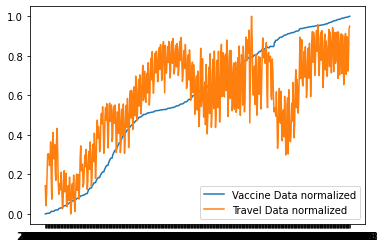

In [7]:
plt.plot(vaccine_travel['Date'], vaccine_data_normalized, label = 'Vaccine Data normalized')
plt.plot(vaccine_travel['Date'], travel_data_normalized, label = 'Travel Data normalized')
plt.legend()
plt.show()

**<h2>Wald's 2-Sample Test </h2>**


Null Hypothesis: delta=0 (Traveling of passengers through flight is proportional to the number of vaccination)

Alternate Hypothesis: delta!=0 (Traveling of passengers through flight is not proportional to the number of vaccination)

Walds test is performed on the normalized data of number of passengers as well as number of vaccinations

In [8]:
mean_vaccine = np.mean(vaccine_data_normalized)
mean_travel = np.mean(travel_data_normalized)

In [9]:
def Calculate_var(x, mean_x):
  square_sum=0
  for i in range(0, len(x)):
    square_sum += (x[i] - mean_x)**2
  return square_sum / len(x)

In [10]:
delta = abs(mean_travel - mean_vaccine)
se = np.sqrt((Calculate_var(vaccine_data_normalized, mean_vaccine) + Calculate_var(travel_data_normalized, mean_travel)))
wald = abs(delta/se)
wald

0.025732354918676974

**<h2> Result: </h2>**

Walds statistic = 0.025732354918676974 which is less than 1.96 (taking alpha=0.05), hence we accept null hypothesis. 

Thus, number of passengers traveling through flight is proportional to the number of vaccinations.
